In [1]:
from IPython.display import Markdown, display

display(Markdown("header.md"))

header.md

## Session 01 - Introduction, central tendencies and variations

In [2]:
# !pip install jupyter_black

In [3]:
# Initial imports
import unittest
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")

# import jupyter_black

# jupyter_black.load()

### Central tendancy

#### [easy] write a function that computes the mean of an iterable given as parameter
This should be pretty straightforward, since the formula for the population mean and the sample mean are the same you will only define one function.

In [4]:
def msds_sum(data):
    """
    Computes the sum of every element of the iterable

    """
    if len(data) == 0:
        return None
    else:
        final_sum = 0
        for i in data:

            final_sum += i
        return final_sum


def msds_mean(data):
    """
    Computes the average of every element of the iterable
    """
    if len(data) == 0:
        return None
    else:

        final_sum = msds_sum(data)
        final_avg = final_sum / len(data)
        return final_avg


def test_msds_mean():
    assert msds_mean([]) is None
    assert msds_mean([1]) == 1
    assert msds_mean([1, 2, 3]) == 2
    assert msds_mean([1, 2, 2, 3, 4]) == 2.4
    tc = unittest.TestCase()
    with tc.assertRaises(Exception):
        msds_mean("sdfds")


test_msds_mean()

#### [moderate] write a function that computes the median of an iterable given as parameter.
Be careful to refer to the definition of the median!

In [5]:
a = [5, 2, 6, 7, 1]
a.sort()
a

[1, 2, 5, 6, 7]

In [6]:
def msds_median(data):
    """
    Computes the median value of an iterable
    """
    if len(data) == 0:
        return None

    if isinstance(data, str):
        return "f"

    elif len(data) % 2 == 0:
        middle = len(data) // 2
        middlenext = round((len(data) + 1) / 2)
        data.sort()
        final_sum = data[middle - 1] + data[middlenext - 1]
        final_median = final_sum / 2
        return final_median

    else:
        middle = len(data) // 2
        data.sort()
        return data[middle - 1]


# a, b, c = msds_median([1, 2, 2, 3, 3, 4])
# print(a, b, c)


def test_msds_median():
    assert msds_median([]) is None
    assert msds_median([1]) == 1
    assert msds_median([1, 2, 2, 3, 4]) == 2
    assert msds_median([1, 2, 2, 3, 3, 4]) == 2.5
    assert msds_median("sdfds") == "f"


test_msds_median()

#### [moderate] write a function that computes the mode of an iterable given as parameter.
Be careful to refer to the definition of the mode!

In [7]:
def msds_mode(data):
    """
    Computes the mode value of an iterable (most frequent value)
    """
    if len(data) == 0:
        return None

    elif isinstance(data, str):
        return "s"

    elif len(data) != 0:

#         mode_dict = {}
#         for i in data:
#             mode_dict[i] = data.count(i)

#         return max(mode_dict, key=mode_dict.get)
        mode=data[0]
        for element in data:
            if data.count(element)>data.count(mode):
                mode=element
        return mode


def test_msds_mode():
    assert msds_mode([]) is None
    assert msds_mode([1]) == 1
    assert msds_mode([1, 2, 2, 3, 4]) == 2
    assert msds_mode([1, 2, 2, 3, 3, 4]) == 2
    assert msds_mode("sdfdss") == "s"


test_msds_mode()

### Dispersion and variation

#### [easy] write a function that computes the range of an iterable given as parameter.

You can use standard python `max` and `min` functions!<br>
Don't hesitate to write you own min/max functions is you like!

In [8]:
def msds_range(data):
    if len(data) == 0:
        return None
    else:
        max_value = max(data)
        min_value = min(data)
        return max_value - min_value


def test_msds_range():
    assert msds_range([]) is None
    assert msds_range([1]) == 0
    assert msds_range([1, 2, -10, 10, 3]) == 20
    tc = unittest.TestCase()
    with tc.assertRaises(Exception):
        msds_harmonic_mean("sdfds")


test_msds_range()

#### [easy] write a function that computes the sample variance of an iterable

Remember, the sample variance is defined as:
$\Large \sum_{i=1}^{n}\frac{(X_i-\bar{X})^2}{n-1}$

In [9]:
def msds_sample_variance(data):
    if len(data) == 0:
        return None
    if len(data) == 1:
        return None
    variance=0
    for i in data:
        variance+=((i-msds_mean(data))**2)/(len(data)-1)
        
    return variance
        


def test_msds_sample_variance():
    test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
    test_data2 = [7, 15, 36, 39, 40, 41]
    import statistics

    assert msds_sample_variance([]) is None
    assert msds_sample_variance([1]) is None
    assert msds_sample_variance([1, 2, 3]) == 1
    assert (
        abs(msds_sample_variance(test_data1) - statistics.variance(test_data1)) < 1e-10
    )
    assert (
        abs(msds_sample_variance(test_data2) - statistics.variance(test_data2)) < 1e-10
    )


test_msds_sample_variance()

#### [easy] write a function that computes the population variance of an iterable

The formula is very close to the sample variance, but the denominator is slightly different:

$\Large \sum_{i=1}^{n}\frac{(X_i-\bar{X})^2}{n}$

In [10]:
def msds_variance(data):
    if len(data) == 0:
        return None
    if len(data) == 1:
        return None
    variance=0
    for i in data:
        variance+=((i-msds_mean(data))**2)/(len(data))
        
    return variance



def test_msds_variance():
    test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
    test_data2 = [7, 15, 36, 39, 40, 41]
    import statistics

    assert msds_variance([]) is None
    assert (msds_variance([1, 2, 3]) - 0.666666666) < 1e-5
    assert abs(msds_variance(test_data1) - statistics.pvariance(test_data1)) < 1e-10
    assert abs(msds_variance(test_data2) - statistics.pvariance(test_data2)) < 1e-10


test_msds_variance()

#### [easy] write a function that computes the sample standard deviation of an iterable

Standard deviation is the square root of the variance.

In [11]:
def msds_sample_std(data):
    if len(data) == 0:
        return None
    if len(data) == 1:
        return None
    variance=0
    for i in data:
        variance+=((i-msds_mean(data))**2)/(len(data)-1)
        
    return variance**0.5



def test_msds_sample_std():
    test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
    test_data2 = [7, 15, 36, 39, 40, 41]
    import statistics

    assert msds_sample_std([]) is None
    assert msds_sample_std([1]) is None
    assert msds_sample_std([1, 2, 3]) == 1
    assert abs(msds_sample_std(test_data1) - statistics.stdev(test_data1)) < 1e-5
    assert abs(msds_sample_std(test_data2) - statistics.stdev(test_data2)) < 1e-5


test_msds_sample_std()

#### [easy] write a function that computes the population standard deviation of an iterable

Same as the previous one, but on the population variance!

In [12]:
def msds_std(data):
    if len(data) == 0:
        return None
    if len(data) == 1:
        return None
    variance=0
    for i in data:
        variance+=((i-msds_mean(data))**2)/(len(data))
        
    return variance**0.5



def test_msds_std():
    test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
    test_data2 = [7, 15, 36, 39, 40, 41]
    import statistics

    assert msds_std([]) is None
    assert abs(msds_std([1, 2, 3]) - 0.816496580927726) < 1e-5
    assert abs(msds_std(test_data1) - statistics.pstdev(test_data1)) < 1e-5
    assert abs(msds_std(test_data2) - statistics.pstdev(test_data2)) < 1e-5


test_msds_std()

#### [easy] write a function that computes the coefficient of variation of an iterable

The coefficient of variation is the ratio of the sample standard deviation and the sample mean:

$\Large \frac{s}{\bar{X}}$

In [13]:
def msds_coef_var(data):
    if len(data) == 0:
        return None
    if len(data) == 1:
        return None
    variance=0
    for i in data:
        variance+=((i-msds_mean(data))**2)/(len(data)-1)
        
    return (variance**0.5)/msds_mean(data)



def test_msds_coef_var():
    test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
    test_data2 = [7, 15, 36, 39, 40, 41]
    import statistics

    assert msds_coef_var([]) is None
    assert msds_coef_var([1]) is None
    assert msds_coef_var([1, 2, 3]) == 0.5


test_msds_coef_var()

#### [moderate] write a function that computes a quartile

The function should take two parameters: an iterable with the data, and a number indicating which quartile to compute (1,2,3).

There are multiple ways to deal with the fact that most of the time $kn/4, k \in [1,2,3]$ is not an integer. We will use the same as numpy's default implementation (linear approximation).

To do so, we will compute the integer part ($i$) and fractional part ($f$) of $k(n-1)/4$.

The result will be computed as:

$\Large Q_k = X_i + f (X_{i+1} - X_{i})$

$X_i$ is $i$-th data point in the sorted dataset, starting at 0.



In [14]:
import math
def msds_quartile(data, p):
    if len(data) <= 1:
        return None
    
    data.sort()
    n=len(data)
    q=p*(n-1)/4
    f=q-(p*(n-1)//4)
    res=data[int(q)]+(f*(data[int(q+1)]-data[int(q)]))
    
    return res
    


def test_msds_quartile():
    test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
    test_data2 = [7, 15, 36, 39, 40, 41]
    assert msds_quartile(test_data1, 1) == np.quantile(test_data1, 0.25)
    assert msds_quartile(test_data1, 2) == np.quantile(test_data1, 0.5)
    assert msds_quartile(test_data1, 3) == np.quantile(test_data1, 0.75)

    assert msds_quartile(test_data2, 1) == np.quantile(test_data2, 0.25)
    assert msds_quartile(test_data2, 2) == np.quantile(test_data2, 0.5)
    assert msds_quartile(test_data2, 3) == np.quantile(test_data2, 0.75)


test_msds_quartile()

In [15]:
test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
msds_quartile(test_data1, 3)

42.5

In [16]:
test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
np.quantile(test_data1, 0.75)

42.5

#### [easy] write a function that computes the inter-quartile range (IQR)

IQR is simply the difference between $Q_3$ and $Q_1$!

In [17]:
def msds_iqr(data):
   
    return msds_quartile(data, 3)-msds_quartile(data, 1)




def test_msds_iqr():
    test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
    test_data2 = [7, 15, 36, 39, 40, 41]
    assert msds_iqr(test_data1) == 17, f"{msds_iqr(test_data1)}"
    assert msds_iqr(test_data2) == 19.5, f"{msds_iqr(test_data2)}"


test_msds_iqr()

#### [moderate] write a function that Nth-order moment 

Function should have data and $N$ parameters.
The Nth-order moment is defined as:

$\Large m_N = \frac{1}{n}\sum_i(X_i - \bar{X})^N$

with:
 - $\mu$ is the mean
 - $x_i$ is $i$-th data point
 - n is length of data
 - N is parameter



In [18]:
def msds_moment(data, N):
    sum_mom=0
    
    for i in range(N):
        sum_mom+=((data[i]-msds_mean(data))**N)
#         print(sum_mom)
    return (1/(len(data)))*sum_mom
        
        



def test_msds_moment():
    test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
    test_data2 = [7, 15, 36, 39, 40, 41]
    assert (msds_moment(test_data1, 2) - msds_variance(test_data1)) < 1e-5
    assert (msds_moment(test_data2, 2) - msds_variance(test_data2)) < 1e-5
    assert (msds_moment(test_data1, 3) - -3163.492111194589) < 1e-5
    assert (msds_moment(test_data1, 4) - 113326.19657127243) < 1e-5


test_msds_moment()

In [19]:
# test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
# msds_moment(test_data1, 2) - msds_variance(test_data1)

#### [moderate] write a function that computes N-order standard moment
 
#### [moderate] write a function that computes N-th standardized moment
 
Function should have data and $N$ parameters, data should be standardized before computing the moment.
 
The general form for the N-th standardized moment is:
 
$\Large\gamma_N = \frac{\mu_N}{\sigma^N}$
 
3rd standard moment is the **skewness**, an indicator of the **symetry** of the underlying distribution<br>
4th standard moment is **kurtosis**, an indicator of the **tailedness** of the underlying distrution the underlying distrution a measure for the fattness of the tail. The distribution approaches zero fast or slow. The Number of outliers is more in comparison with the other distribution.
 
 
write helper functions to compute skewness and kurtosisFunction should have data and $N$ parameters, data should be standardized before computing the moment.
 
3rd standard moment is the **skewness**, an indicator of the **symetry** of the underlying distribution<br>
4th standard moment is **kurtosis**, an indicator of the **tailedness** of the underlying distrution
 
write helper functions to compute skewness and kurtosis

In [20]:
from scipy.stats import skew, kurtosis


def msds_standard_moment(data, N):
    
    return (msds_moment(data, N)/(msds_std(data)**N))


def msds_skewness(data):
    
    return msds_standard_moment(data, 3)


def msds_kurtosis(data):
    return msds_standard_moment(data, 4)


def test_msds_standard_moment():
    test_data1 = [6, 7, 15, 36, 39, 40, 41, 42, 43, 47, 49]
    test_data2 = [7, 15, 36, 39, 40, 41]

    assert (msds_standard_moment(test_data1, 3) - skew(test_data1)) < 1e-5
    assert (
        msds_standard_moment(test_data1, 4) - kurtosis(test_data1, fisher=False)
    ) < 1e-5
    assert (msds_standard_moment(test_data2, 3) - skew(test_data2)) < 1e-5
    assert (
        msds_standard_moment(test_data2, 4) - kurtosis(test_data2, fisher=False)
    ) < 1e-5
#     assert msds_iqr(test_data2) == 40 - 15


test_msds_standard_moment()

# Data cleaning

#### [moderate] identify and fix issues in a dataset 

Load the `err_salary.csv` dataset.
It contains several mistakes, identify and fix them!


In [21]:
df=pd.read_csv("err_salary.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age_Months
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,387.0
1,28.0,Female,NaN,NaN,3.0,65000.0,339.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,543.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,435.0
4,52.0,Male,Master's,Director,20.0,200000.0,627.0
...,...,...,...,...,...,...,...
377,23.0,Female,Bachelor's,Junior Marketing Analyst,0.5,35000.0,279.0
378,31.0,Male,Bachelor's,Junior Project Manager,4.0,60000.0,375.0
379,30.0,Female,Bachelor's,Junior Copywriter,3.0,45000.0,363.0
380,37.0,Male,Master's,Senior Business Analyst,9.0,105000.0,447.0


In [22]:
df.drop_duplicates(inplace=True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Age_Months
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,387.0
1,28.0,Female,NaN,NaN,3.0,65000.0,339.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,543.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,435.0
4,52.0,Male,Master's,Director,20.0,200000.0,627.0
...,...,...,...,...,...,...,...
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0,435.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0,531.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0,375.0
366,31.0,Female,NaN,NaN,3.0,50000.0,375.0


In [23]:
df.isnull().sum()

Age                     1
Gender                  1
Education Level        11
Job Title              11
Years of Experience     1
Salary                  1
Age_Months              1
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 0 to 371
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  329 non-null    float64
 1   Gender               329 non-null    object 
 2   Education Level      319 non-null    object 
 3   Job Title            319 non-null    object 
 4   Years of Experience  329 non-null    float64
 5   Salary               329 non-null    float64
 6   Age_Months           329 non-null    float64
dtypes: float64(4), object(3)
memory usage: 20.6+ KB


In [25]:
df.Age.value_counts().sum()

329

In [26]:
df['Gender'].value_counts()

Gender
Male      173
Female    156
Name: count, dtype: int64

In [27]:
df['Gender'].nunique()

2

In [28]:
df['Education Level'].value_counts()

Education Level
Bachelor's     182
Master's        86
PhD             40
Do not know     11
Name: count, dtype: int64

In [29]:
df['Job Title'].value_counts().reset_index()

,Job Title,count
0,Director of Operations,9
1,Senior Marketing Manager,8
2,Director of Marketing,8
3,Senior Project Manager,7
4,Senior Data Scientist,6
...,...,...
168,Web Developer,1
169,Business Development Manager,1
170,Customer Service Representative,1
171,IT Manager,1


In [30]:
df['Years of Experience'].value_counts()

Years of Experience
3.0      28
2.0      26
9.0      19
8.0      17
5.0      16
4.0      16
10.0     16
7.0      16
16.0     15
12.0     14
19.0     14
20.0     13
18.0     12
14.0     12
15.0     12
6.0      11
21.0     11
1.5      10
11.0      9
22.0      9
13.0      9
1.0       6
17.0      5
25.0      3
0.0       3
23.0      2
126.0     1
24.0      1
0.5       1
118.0     1
101.5     1
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
for i in newdf.columns:
    print(i)

NameError: name 'df' is not defined

In [32]:
df.describe(percentiles=[0.01,.25,.5,.75,.99])

,Age,Years of Experience,Salary,Age_Months
count,329.000000,329.000000,3.290000e+02,329.000000
mean,37.477204,11.139818,2.035890e+05,452.726444
std,7.217458,12.039514,9.344651e+05,86.609500
min,23.000000,0.000000,3.500000e+02,279.000000
1%,25.000000,0.640000,3.500000e+04,303.000000
25%,31.000000,4.000000,5.500000e+04,375.000000
50%,37.000000,9.000000,9.500000e+04,447.000000
75%,44.000000,16.000000,1.400000e+05,531.000000
99%,51.720000,25.000000,5.627424e+06,623.640000
max,53.000000,126.000000,9.482687e+06,639.000000


In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Age_Months             0
dtype: int64

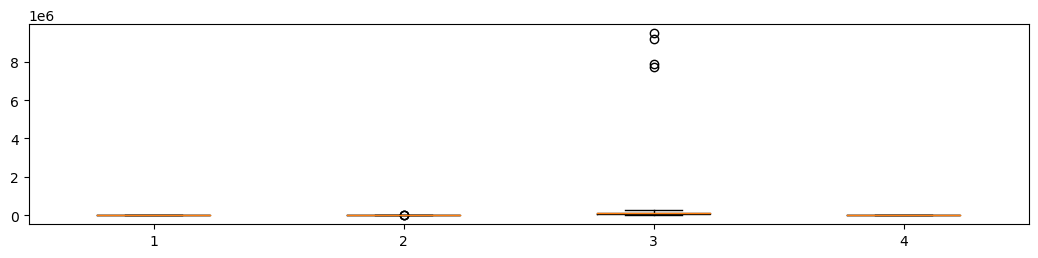

In [35]:
data = [df['Age'], df["Years of Experience"], df["Salary"], df["Age_Months"]]

fig = plt.figure(figsize =(10,2 ))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot(data)

# show plot
plt.show()

In [36]:
df.drop("Age_Months",axis=1,inplace=True) # axis=1 for column , 0 for rows and mention the index of the row
final_df=df[df["Years of Experience"]<=25]
final_df # final data frame with removed outliers, missing values and duplicate rows and columns (Age_months)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0
